# Google Practicum

## Exploratory Analysis: Illinois Maize Data

In [1]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import os

In [2]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/uditanand/Desktop/Github/GooglePracticum


In [3]:
# Import Names of counties from file
maize_data_dir = cwd + '/Data/Maize/'
IL_county_data = maize_data_dir + 'County_Names_IL.csv'
county_data = pd.read_csv(IL_county_data)

# rename Ag district to Ag_District
county_data.rename(columns={'Ag District': 'Ag_District'}, inplace=True)

# making all column names UPPER CASE --> inline with the weather data file
county_data.columns = map(str.upper, county_data.columns)

# making COUNTY, STATE, AG DISTRICT, COMMODITY data lower case
# CAN BE MADE FASTER WITH A LAMBDA FUNCTION
county_data.STATE = county_data.STATE.str.lower()
county_data.AG_DISTRICT = county_data.AG_DISTRICT.str.lower()
county_data.COUNTY = county_data.COUNTY.str.lower() 
county_data.COMMODITY = county_data.COMMODITY.str.lower()

print(county_data.head())

# Print name of unique districts
ag_district_list = list(county_data['AG_DISTRICT'].unique())
print(" \n Agricultural Districts: \n")
print(ag_district_list)

      STATE AG_DISTRICT      COUNTY COMMODITY     VALUE
0  illinois     central      mclean      corn  70340000
1  illinois     central       logan      corn  43723000
2  illinois     central    tazewell      corn  33978000
3  illinois        east  livingston      corn  63438000
4  illinois        east    iroquois      corn  62228000
 
 Agricultural Districts: 

['central', 'east', 'east southeast', 'northeast', 'northwest', 'southeast', 'southwest', 'west', 'west southwest']


In [4]:
# Group counties belonging to a particular agricultural district and store them in a dictionary

district_county_dict = {}

for district in ag_district_list:
    county_in_ag_district = county_data[(county_data['AG_DISTRICT'] == district)] 
    county_in_ag_district = county_in_ag_district['COUNTY']
    district_county_dict[district] = county_in_ag_district

# Print the dictionary, Structure {Region_1: County_1, County_2 ,... ; Region_2: County_1, County_2.. }
for key,values in district_county_dict.items():
    print(key)
    print(values)
    print("\n")


central
0      mclean
1       logan
2    tazewell
Name: COUNTY, dtype: object


east
3    livingston
4      iroquois
5     champaign
Name: COUNTY, dtype: object


east southeast
6      edgar
7     shelby
8    douglas
Name: COUNTY, dtype: object


northeast
9     la salle
10     de kalb
11      grundy
Name: COUNTY, dtype: object


northwest
12    bureau
13       lee
14      ogle
Name: COUNTY, dtype: object


southeast
15    gallatin
16       white
17    hamilton
Name: COUNTY, dtype: object


southwest
18      st clair
19       clinton
20    washington
Name: COUNTY, dtype: object


west
21     warren
22    hancock
23       knox
Name: COUNTY, dtype: object


west southwest
24     sangamon
25    christian
26     macoupin
Name: COUNTY, dtype: object




In [5]:
#NOTE: 
#-----
# Sample code for accessing a particular value in the dictionary

# values = district_county_dict['CENTRAL']
# print(values)
# print("\n")
# print(values[0])

In [6]:
# Import weather data file
weather_data_dir = cwd + '/Data/Weather/'
sample_weather_file = weather_data_dir + 'weather_data.csv'
sample_weather_data = pd.read_csv(sample_weather_file)

print("\n Column Information \n")
print(sample_weather_data.columns.all)



 Column Information 

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Index(['INDEX', 'COUNTY', 'YEAR', 'MONTH', 'TMP_HIGH', 'TMP_AVG', 'TMP_LOW',
       'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW',
       'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG',
       'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM'],
      dtype='object')>


In [7]:
# Append corresponding AGRICULTURAL DISTRICT to COUNTY
sample_weather_data['AG_DISTRICT'] = "Dummy"

# reorder the AG_DISTRICT to become the first column
colnames = sample_weather_data.columns.tolist()
colnames = colnames[-1:] + colnames[:-1]
sample_weather_data = sample_weather_data[colnames]

county_names_list = list(county_data['COUNTY'].unique())

for county in county_names_list:
    county_district = county_data[(county_data['COUNTY'] == county)] 
    county_district = county_district['AG_DISTRICT']
    
    selected_county = sample_weather_data[(sample_weather_data['COUNTY'] == county)]
    
    sample_weather_data.loc[sample_weather_data['COUNTY'] == county, 'AG_DISTRICT'] = county_district.values

sample_weather_data.loc[:,['AG_DISTRICT','COUNTY']].head()
sample_weather_data.head()
# sample_weather_data.iloc[:,5:26]

,AG_DISTRICT,INDEX,COUNTY,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
0,central,0,mclean,2001,JAN,41.0,24.935484,3.0,37.0,22.032258,...,20.0,7.774194,0.0,21.0,9.322581,0.0,5.0,10.0,4.0,0.0
1,central,1,mclean,2001,FEB,57.0,28.964286,-2.0,55.0,22.892857,...,20.0,9.464286,0.0,24.0,10.035714,0.0,7.0,7.0,2.0,3.0
2,central,2,mclean,2001,MAR,59.0,36.225806,15.0,50.0,26.193548,...,20.0,11.000000,1.0,20.0,9.322581,0.0,6.0,5.0,1.0,0.0
3,central,3,mclean,2001,ARP,84.0,57.533333,28.0,68.0,42.566667,...,20.0,12.033333,1.0,23.0,10.466667,0.0,8.0,1.0,0.0,3.0
4,central,4,mclean,2001,MAY,89.0,63.935484,44.0,68.0,51.709677,...,20.0,10.580645,0.0,25.0,8.129032,0.0,11.0,0.0,2.0,2.0


In [8]:
# NOTE: HANDLE WITH CARE. DO NOT UNCOMMENT
#groupby_ag_district_month_year = sample_weather_data.groupby(['YEAR', 'MONTH', 'AG_DISTRICT'])
#print("\n Average Precipitation: \n")
#print(groupby_ag_district_month_year['PRECIP'].mean())


## Summarize the weather for an ag

In [11]:
groupby_ag_district = sample_weather_data.groupby(['YEAR', 'MONTH','AG_DISTRICT'])
sample_data = groupby_ag_district['NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_THNDRSTRM','NUM_DAYS_SNOW','NUM_DAYS_FOG','PRECIP'].sum()

# Writes to Excel
# writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
# sample_data.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
# writer.save()

#sample_data.iloc[:9]

sample_data.iloc[:,:]



NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM  \
YEAR MONTH AG_DISTRICT                                                      
2001 ARP   central                26.0           11.0                11.0   
           east                   21.0            0.0                 9.0   
           east southeast         10.0            0.0                 6.0   
           northeast              26.0            0.0                18.0   
           northwest               0.0            0.0                 7.0   
           southeast               2.0            0.0                12.0   
           southwest              16.0            0.0                24.0   
           west                    0.0            0.0                 0.0   
           west southwest         20.0            2.0                10.0   
     AUG   central                21.0            0.0                11.0   
           east                   13.0            0.0                 6.0   
           east southeast         13.0            0.0                 6.0   
           northwest               0.0            0.0                 5.0   
           southwest               8.0            0.0                 7.0   
           west                    0.0            0.0                 0.0   
           west southwest         13.0            0.0                 7.0   
     DEC   central                13.0           20.0                 0.0   
           east                    8.0           10.0                 0.0   
           east southeast          8.0           10.0                 0.0   
           northwest               0.0            0.0                 1.0   
           southwest              11.0            4.0                 0.0   
           west                    0.0            0.0                 0.0   
           west southwest          7.0            8.0                 1.0   
     FEB   central                15.0           18.0                 5.0   
           east                    9.0           10.0                 4.0   
           east southeast          9.0           10.0                 4.0   
           northeast               1.0            0.0                 0.0   
           northwest               6.0            9.0                 2.0   
           southeast               0.0            0.0                 0.0   
           southwest              11.0            7.0                 3.0   
...                                ...            ...                 ...   
2016 MAY   southwest              57.0            0.0                32.0   
           west                   39.0            0.0                20.0   
           west southwest         45.0            0.0                24.0   
     NOV   central                21.0            0.0                 8.0   
           east                   26.0            1.0                 4.0   
           east southeast         24.0            0.0                 6.0   
           northeast              23.0            2.0                 5.0   
           northwest              24.0            3.0                 6.0   
           southeast              22.0            0.0                 3.0   
           southwest              24.0            0.0                 7.0   
           west                   19.0            0.0                 4.0   
           west southwest         24.0            2.0                11.0   
     OCT   central                29.0            0.0                13.0   
           east                   29.0            0.0                14.0   
           east southeast         22.0            0.0                13.0   
           northeast              32.0            0.0                20.0   
           northwest              36.0            0.0                17.0   
           southeast              18.0            0.0                 9.0   
           southwest              18.0            0.0                12.0   
           west        

### Visualize the total precipitation received  across all districts for a particular year


AG_DISTRICT     YEAR
central         2001    38.29
east            2001    36.61
east southeast  2001    44.68
northeast       2001    19.34
northwest       2001    22.36
Name: PRECIP, dtype: float64




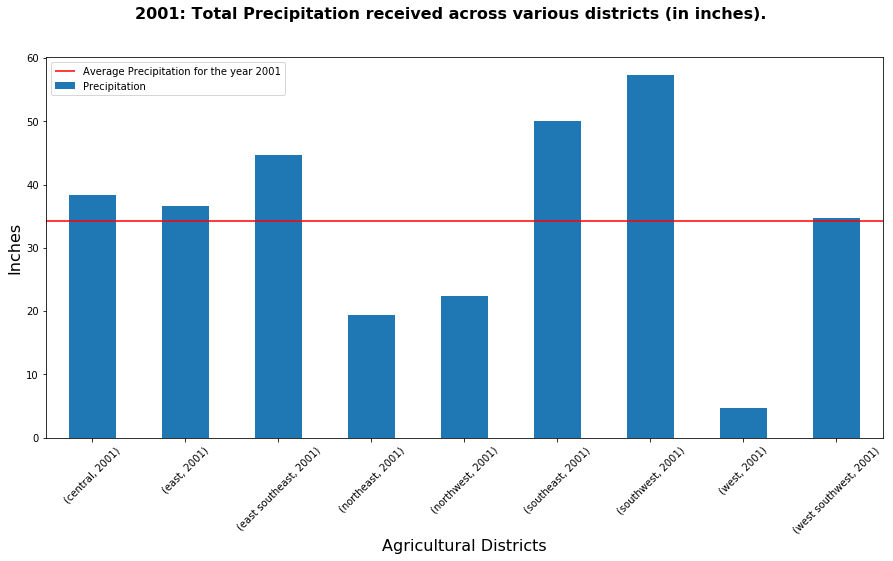

AG_DISTRICT     YEAR
central         2002    61.09
east            2002    59.82
east southeast  2002    82.81
northeast       2002    50.21
northwest       2002    50.21
Name: PRECIP, dtype: float64




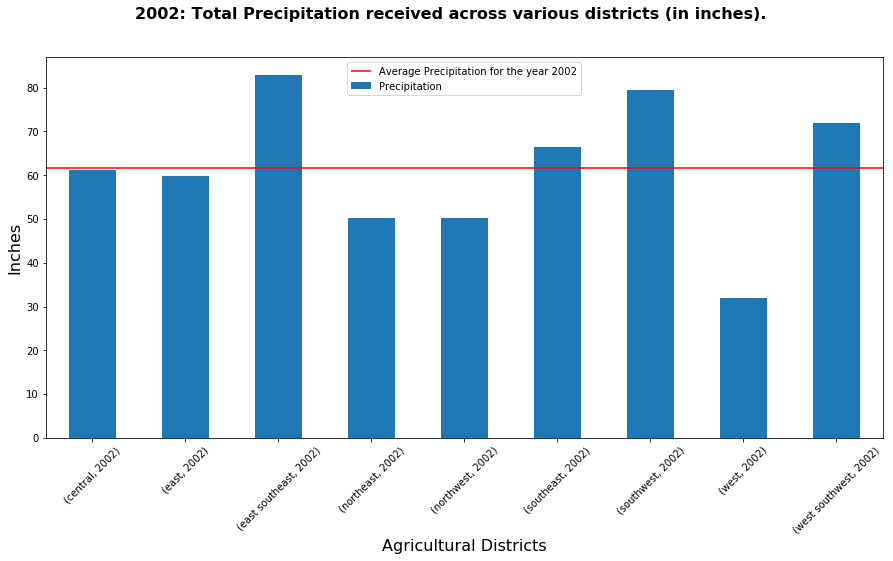

AG_DISTRICT     YEAR
central         2003    49.72
east            2003    51.01
east southeast  2003    70.53
northeast       2003    45.46
northwest       2003    74.41
Name: PRECIP, dtype: float64




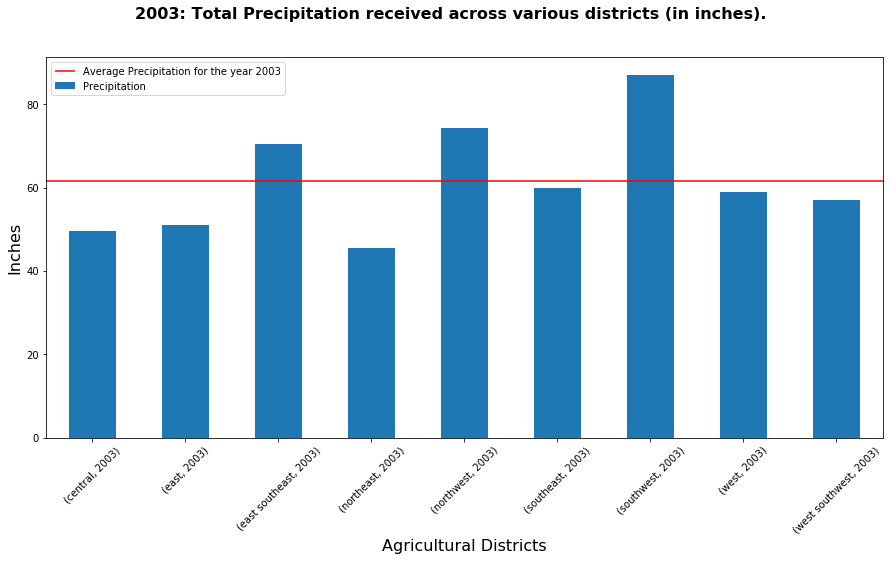

AG_DISTRICT     YEAR
central         2004    60.41
east            2004    51.94
east southeast  2004    60.03
northeast       2004    54.46
northwest       2004    92.82
Name: PRECIP, dtype: float64




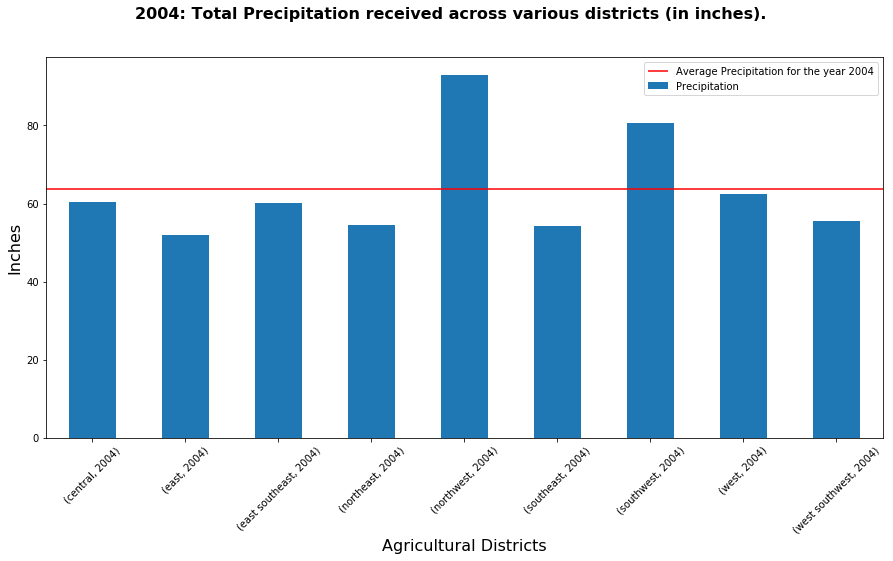

AG_DISTRICT     YEAR
central         2005    52.41
east            2005    44.40
east southeast  2005    59.25
northeast       2005    36.76
northwest       2005    64.73
Name: PRECIP, dtype: float64




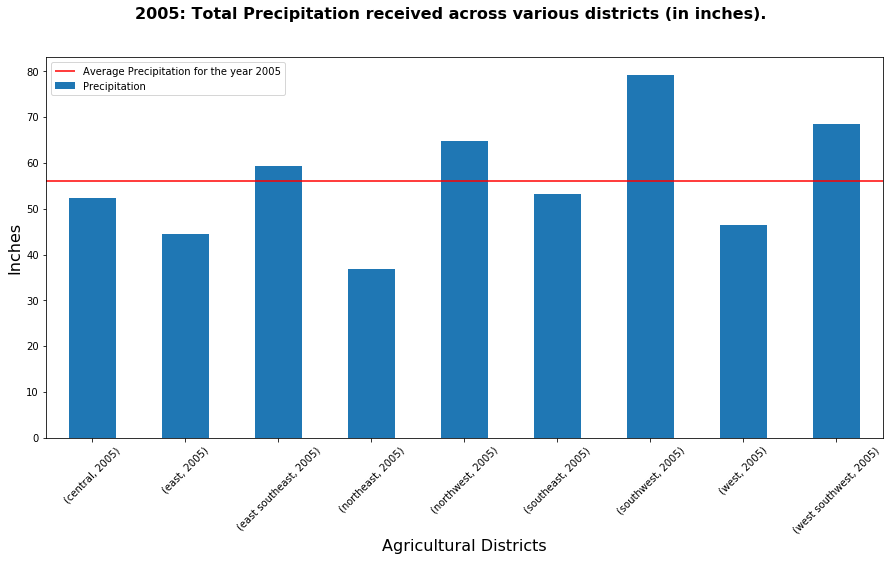

AG_DISTRICT     YEAR
central         2006     71.755
east            2006     51.350
east southeast  2006     82.230
northeast       2006     49.660
northwest       2006    107.460
Name: PRECIP, dtype: float64




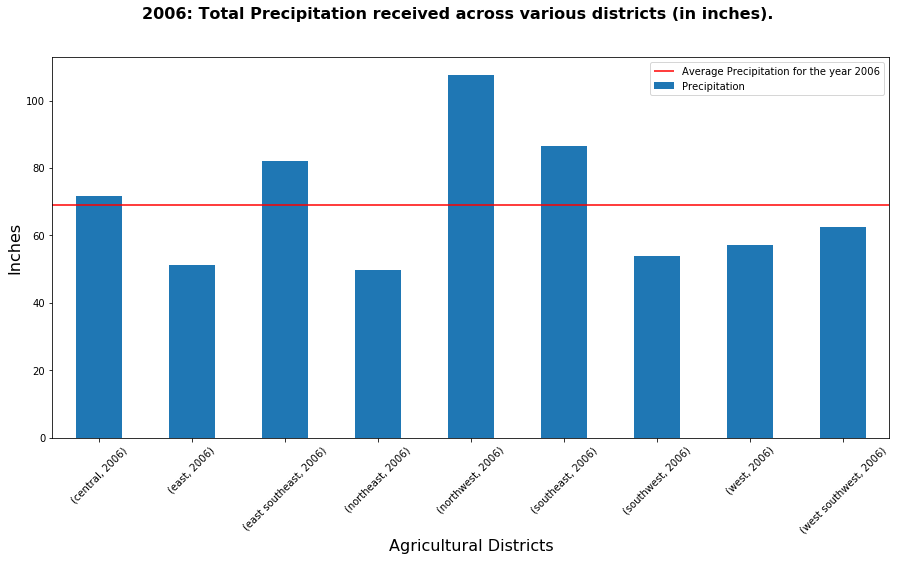

AG_DISTRICT     YEAR
central         2007    83.235
east            2007    54.820
east southeast  2007    58.660
northeast       2007    47.630
northwest       2007    38.140
Name: PRECIP, dtype: float64




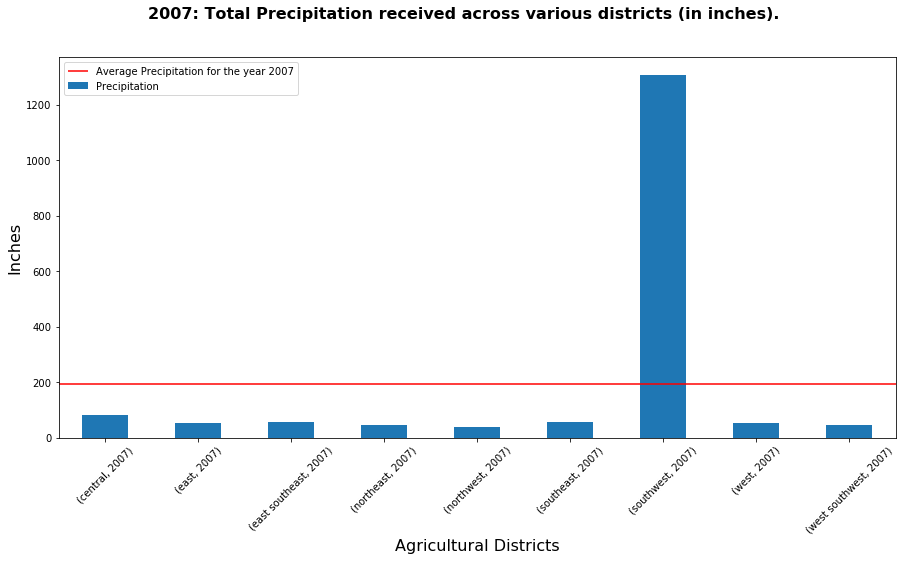

AG_DISTRICT     YEAR
central         2008    106.760
east            2008     81.425
east southeast  2008    115.275
northeast       2008     49.840
northwest       2008     54.800
Name: PRECIP, dtype: float64




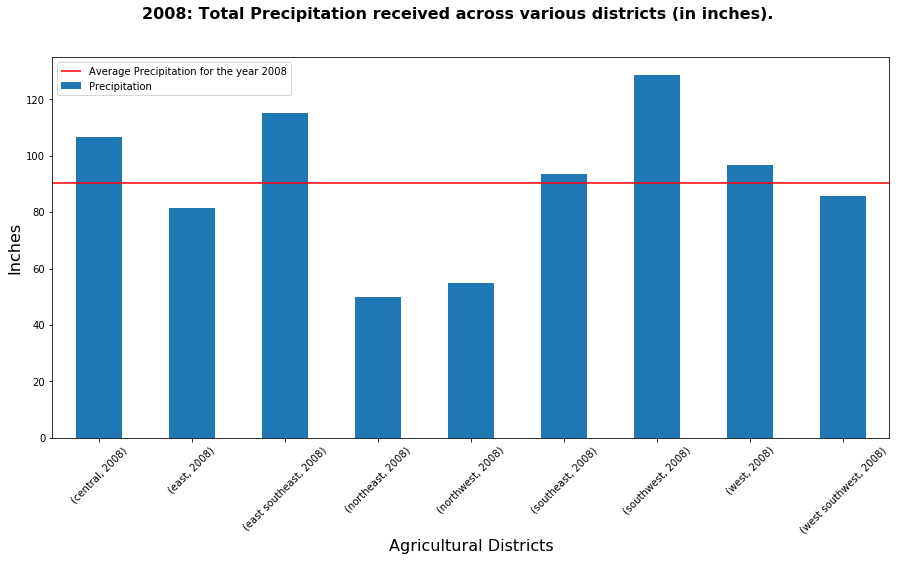

AG_DISTRICT     YEAR
central         2009    120.645
east            2009     79.090
east southeast  2009     92.030
northeast       2009     53.320
northwest       2009    715.810
Name: PRECIP, dtype: float64




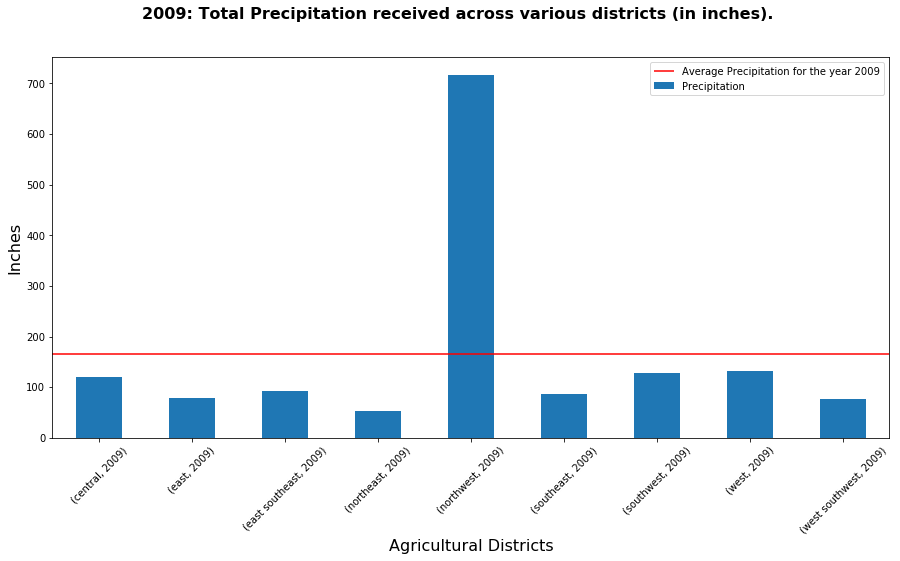

AG_DISTRICT     YEAR
central         2010    89.79
east            2010    53.81
east southeast  2010    74.25
northeast       2010    46.11
northwest       2010    59.66
Name: PRECIP, dtype: float64




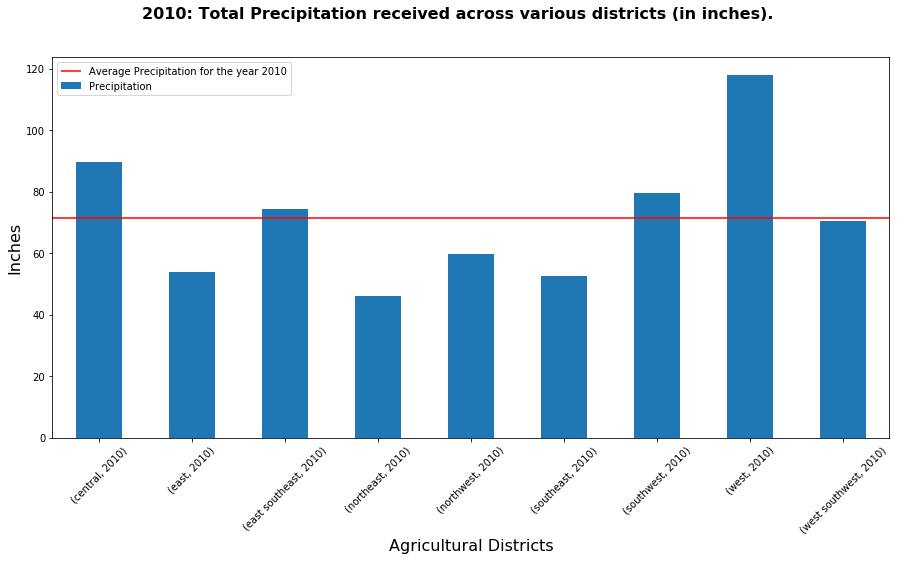

AG_DISTRICT     YEAR
central         2011      92.195
east            2011    1075.770
east southeast  2011    1084.800
northeast       2011      70.730
northwest       2011      76.030
Name: PRECIP, dtype: float64




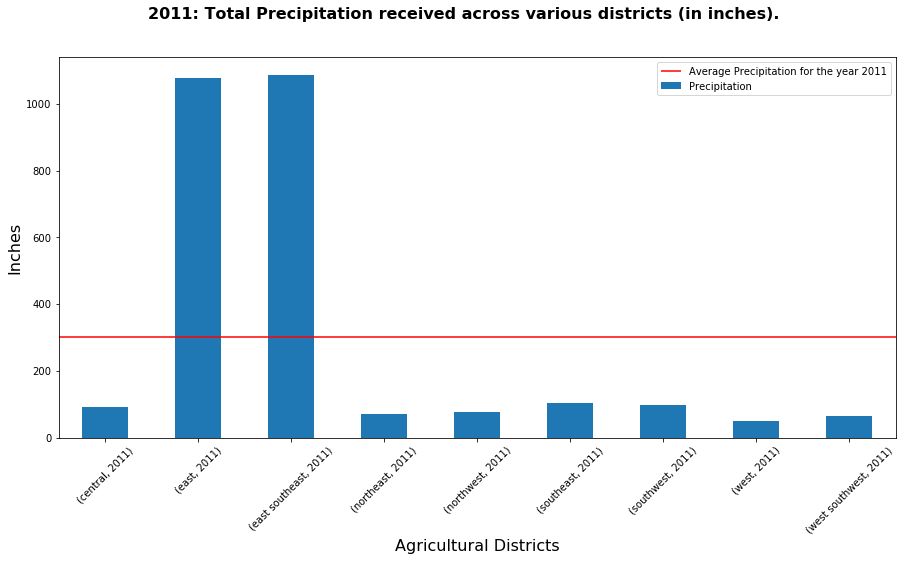

AG_DISTRICT     YEAR
central         2012    71.02
east            2012    70.16
east southeast  2012    68.39
northeast       2012    51.71
northwest       2012    54.96
Name: PRECIP, dtype: float64




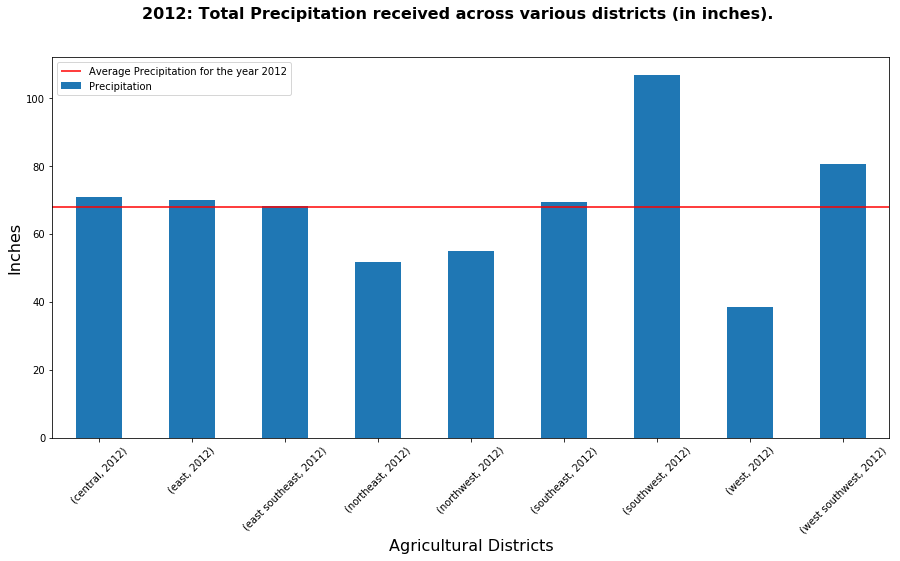

AG_DISTRICT     YEAR
central         2013     93.480
east            2013     91.705
east southeast  2013    101.785
northeast       2013     90.040
northwest       2013     85.150
Name: PRECIP, dtype: float64




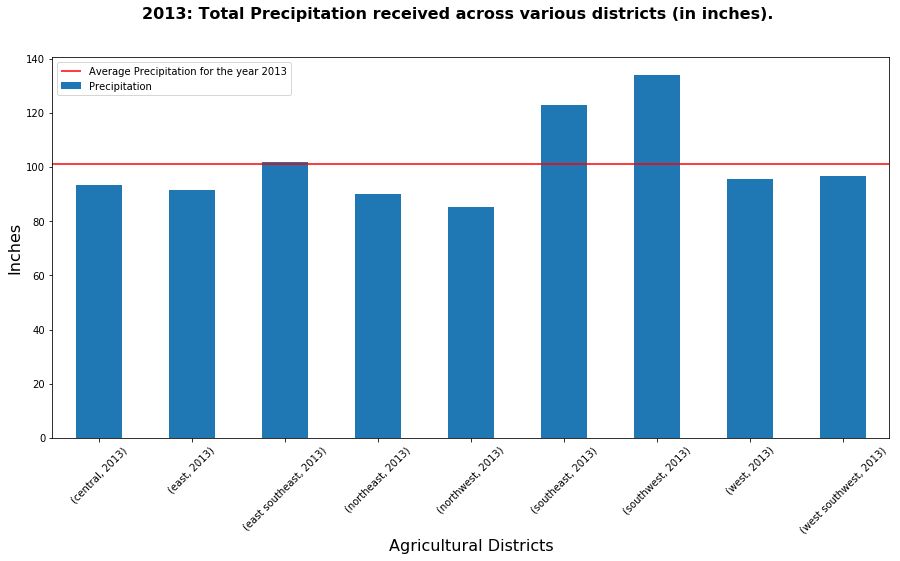

AG_DISTRICT     YEAR
central         2014    104.350
east            2014     99.805
east southeast  2014    100.035
northeast       2014     51.640
northwest       2014     67.920
Name: PRECIP, dtype: float64




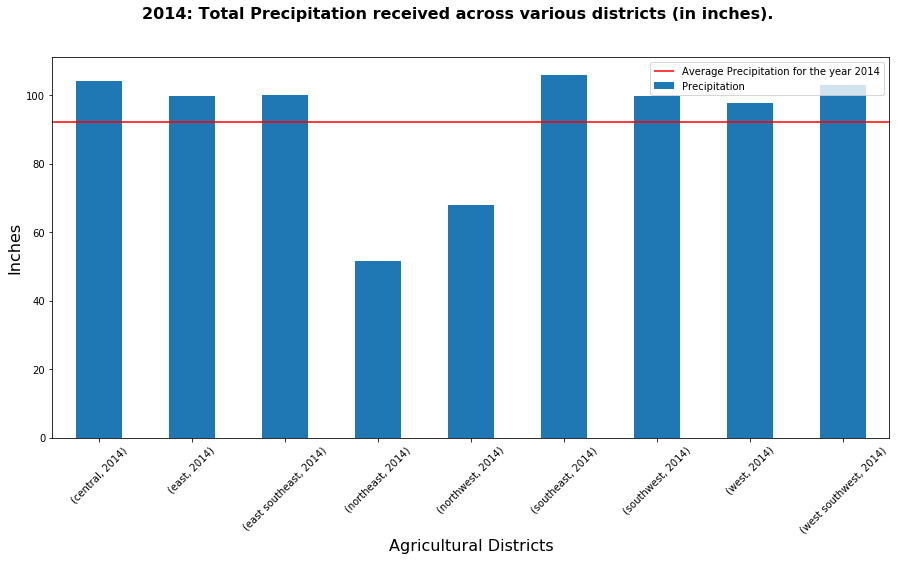

AG_DISTRICT     YEAR
central         2015    133.185
east            2015    114.490
east southeast  2015    107.100
northeast       2015     65.440
northwest       2015    117.190
Name: PRECIP, dtype: float64




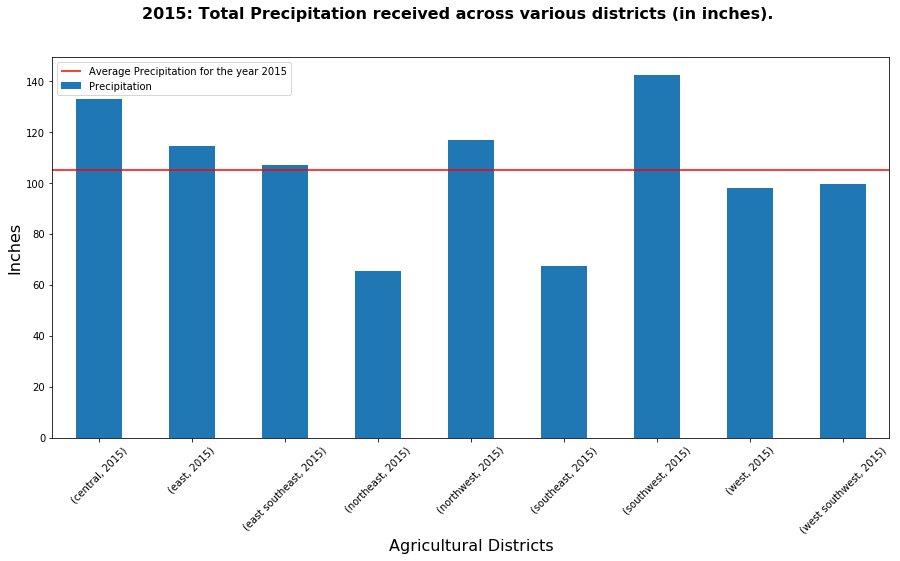

AG_DISTRICT     YEAR
central         2016    108.775
east            2016     84.855
east southeast  2016     92.735
northeast       2016     95.290
northwest       2016    872.540
Name: PRECIP, dtype: float64




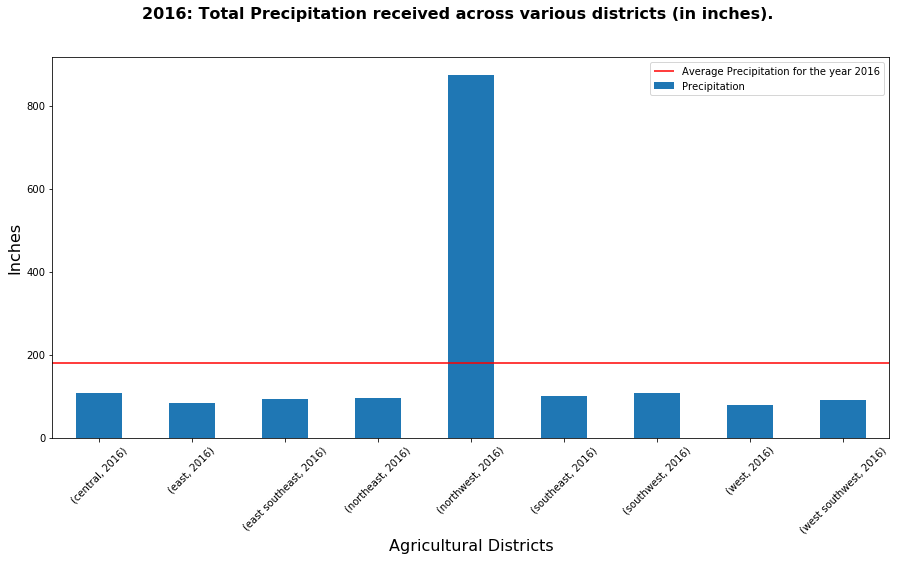

In [12]:
# Precipitation is measured in inches.

start_year = min(sample_weather_data['YEAR'])
end_year = max(sample_weather_data['YEAR'])

# end year + 1 to get it to 2016
for year in range(start_year, end_year+1):
    groupby_yearly = sample_weather_data[sample_weather_data['YEAR'] == year].groupby(['AG_DISTRICT', 'YEAR'])
    groupby_yearly_ppt_data = groupby_yearly['PRECIP'].sum()
    
    print(groupby_yearly_ppt_data.head())
    print("\n")
    #groupby_yearly_ppt_data = groupby_yearly_ppt_data/3
    #print(groupby_yearly_ppt_data.head())
    #print("\n")
    
    # Calculate average precipitation for the given year
    size = groupby_yearly_ppt_data.count()
    average_precipitation = sum(groupby_yearly_ppt_data.iloc[:size].values)/(size)
    
    # Plotting Code
    precp_yearly_title = str(year) + ": Total Precipitation received across various districts (in inches)."
    line_label = "Average Precipitation for the year " + str(year) 
    
    plt.figure(figsize=(15,7))
    plt.suptitle(precp_yearly_title, fontsize=16, fontweight='bold')
    ax1 = groupby_yearly_ppt_data.plot(kind='bar', label ='Precipitation')
    ax2 = plt.hlines(average_precipitation,-2,10, colors='r', linestyles='solid', label=line_label)
    plt.xticks(rotation=45)
    plt.ylabel('Inches', fontsize=16)
    plt.xlabel('Agricultural Districts', fontsize=16)
    plt.legend()
    #plt.savefig("results.jpg")
    plt.show()
    
    # 2008 validation
    # http://www.isws.illinois.edu/atmos/statecli/climate-change/NE-IL-trends/rainfall.htm
   


### Visualize the total precipitation received  across all districts for a particular year

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2001        231.0           82.0                76.0
east           2001        153.0           59.0                59.0
east southeast 2001        146.0           50.0                53.0
northeast      2001         82.0           27.0                28.0
northwest      2001         32.0           19.0                42.0




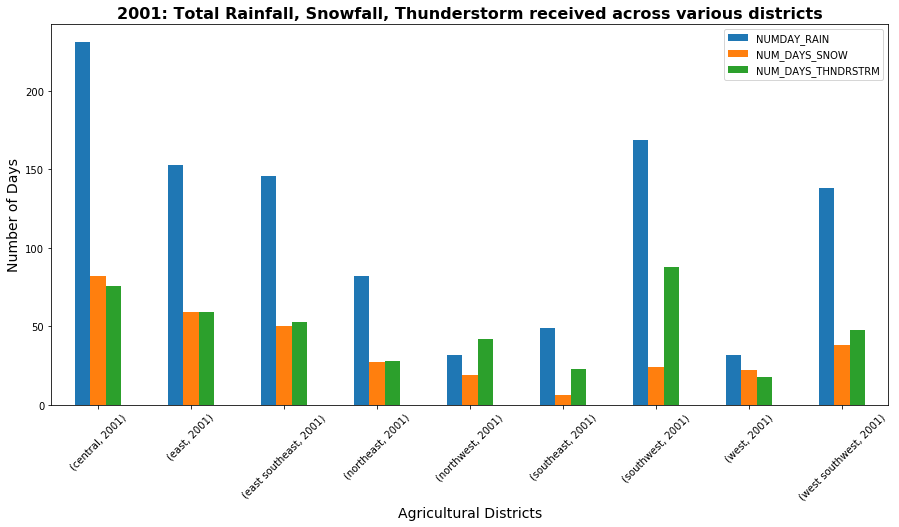

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2002        305.0           84.0               121.0
east           2002        303.0           91.0               161.0
east southeast 2002        311.0           68.0               174.0
northeast      2002        291.0          103.0                65.0
northwest      2002        197.0           68.0                87.0




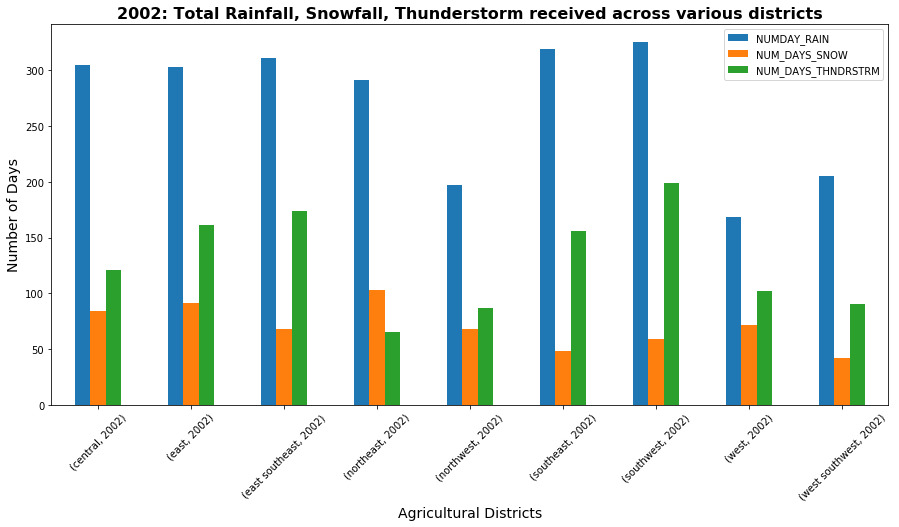

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2003        311.0          123.0               116.0
east           2003        323.0          130.0               148.0
east southeast 2003        335.0          123.0               136.0
northeast      2003        272.0          108.0               135.0
northwest      2003        190.0           71.0               128.0




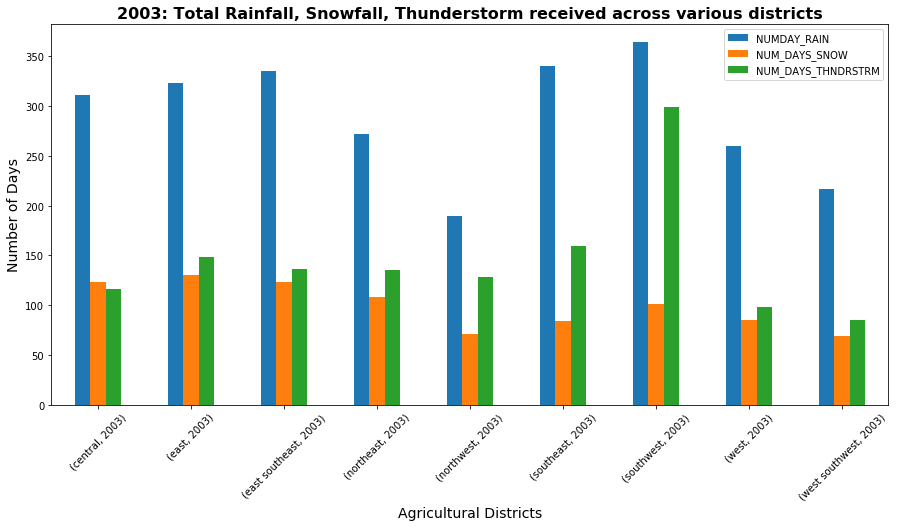

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2004        343.0           87.0               117.0
east           2004        339.0           94.0               159.0
east southeast 2004        344.0           76.0               150.0
northeast      2004        307.0          113.0               152.0
northwest      2004        208.0           75.0               141.0




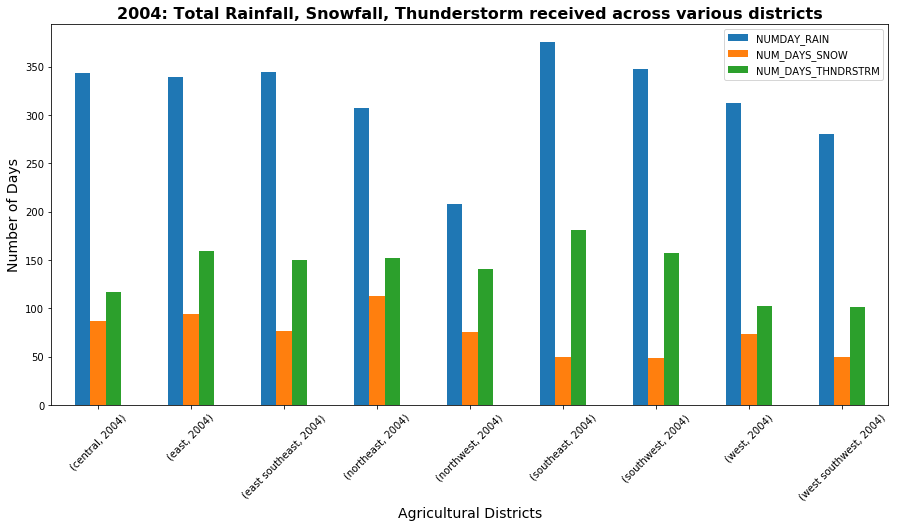

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2005        292.0          112.0               107.0
east           2005        304.0          126.0               161.0
east southeast 2005        321.0           91.0               118.0
northeast      2005        277.0          132.0               164.0
northwest      2005        181.0           87.0               124.0




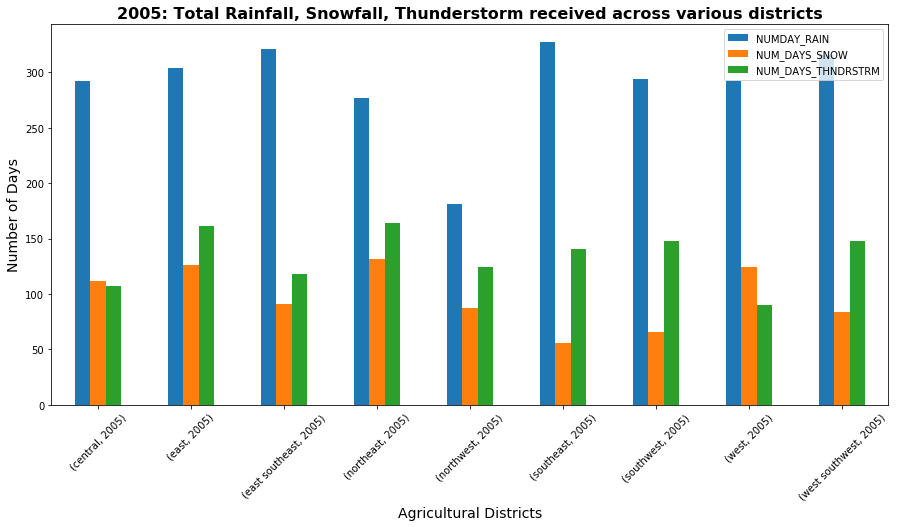

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2006        371.0           57.0               134.0
east           2006        384.0           63.0               197.0
east southeast 2006        352.0           53.0                94.0
northeast      2006        374.0           62.0               207.0
northwest      2006        238.0           36.0               162.0




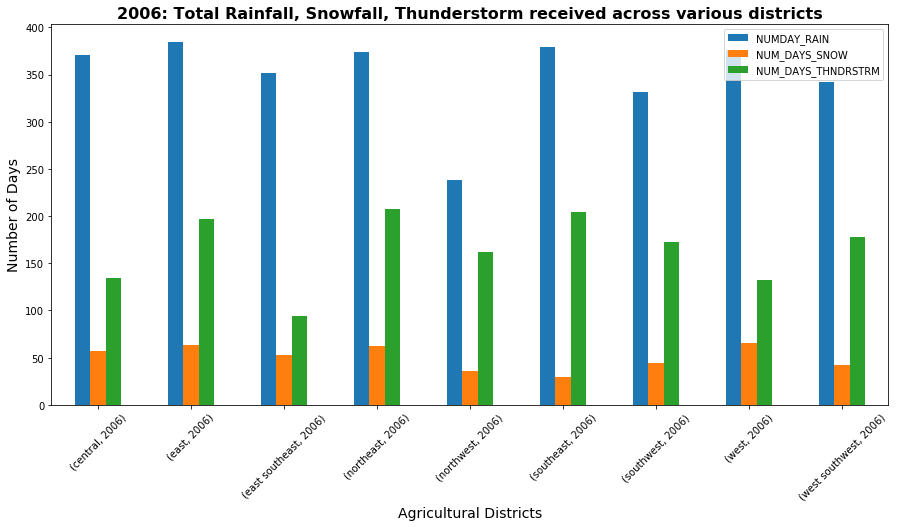

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2007        320.0          107.0               115.0
east           2007        322.0          128.0               148.0
east southeast 2007        358.0           81.0               250.0
northeast      2007        324.0          136.0               153.0
northwest      2007        213.0           83.0               136.0




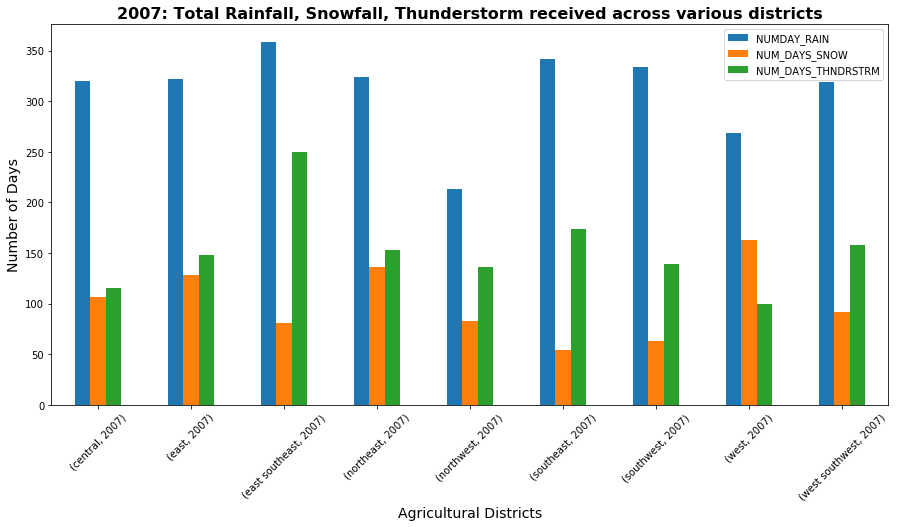

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2008        355.0          157.0               136.0
east           2008        369.0          154.0               171.0
east southeast 2008        385.0          131.0               251.0
northeast      2008        331.0          185.0               175.0
northwest      2008        221.0          121.0               155.0




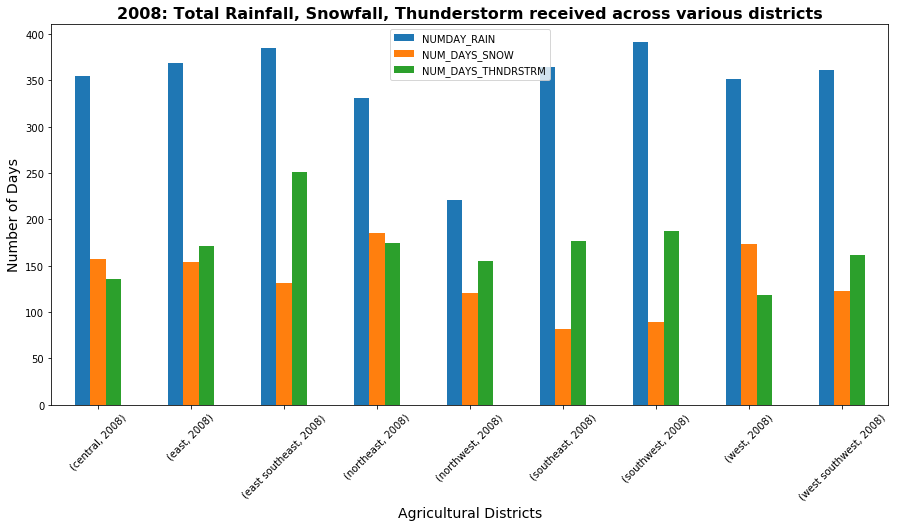

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2009        360.0          118.0               131.0
east           2009        351.0          124.0               153.0
east southeast 2009        363.0           95.0               234.0
northeast      2009        299.0          124.0               100.0
northwest      2009        199.0           79.0                91.0




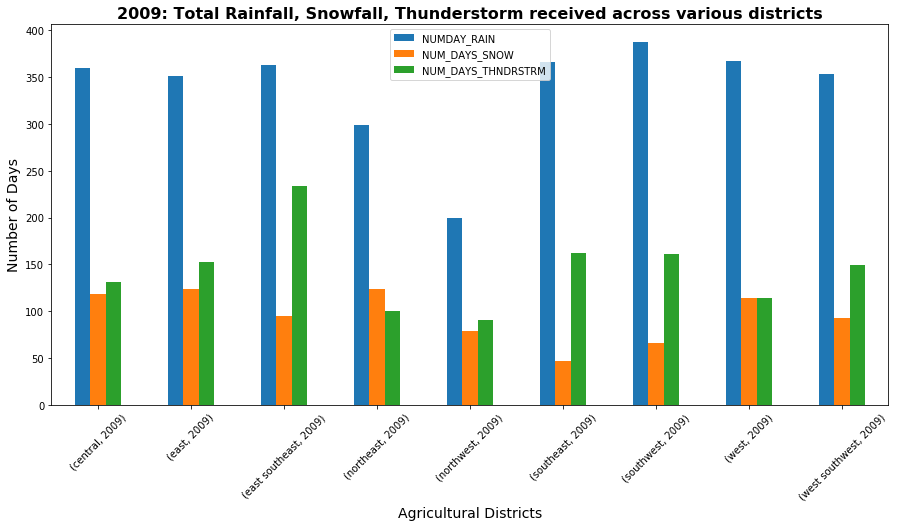

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2010        314.0          109.0               157.0
east           2010        331.0          129.0               178.0
east southeast 2010        325.0          110.0               248.0
northeast      2010        326.0          115.0               161.0
northwest      2010        230.0           79.0               153.0




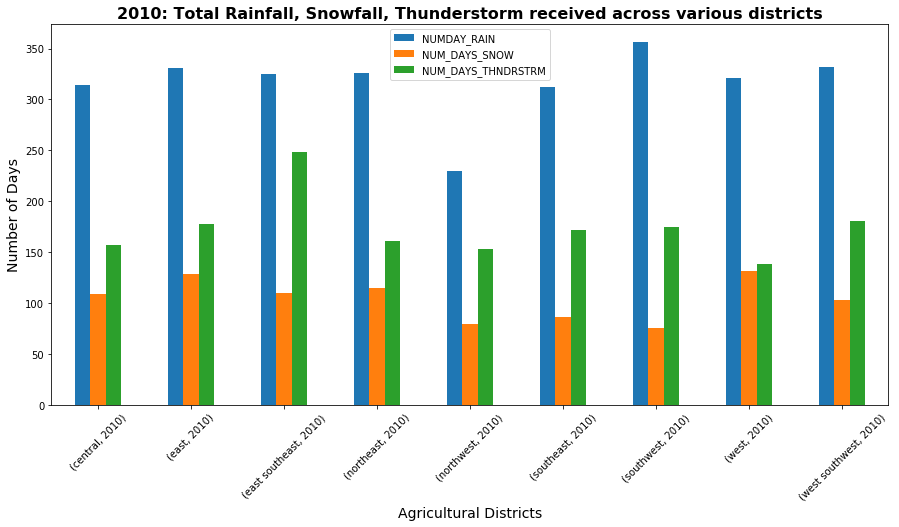

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2011        350.0           76.0               129.0
east           2011        359.0           84.0               148.0
east southeast 2011        366.0           73.0               156.0
northeast      2011        336.0           91.0               145.0
northwest      2011        231.0           55.0               139.0




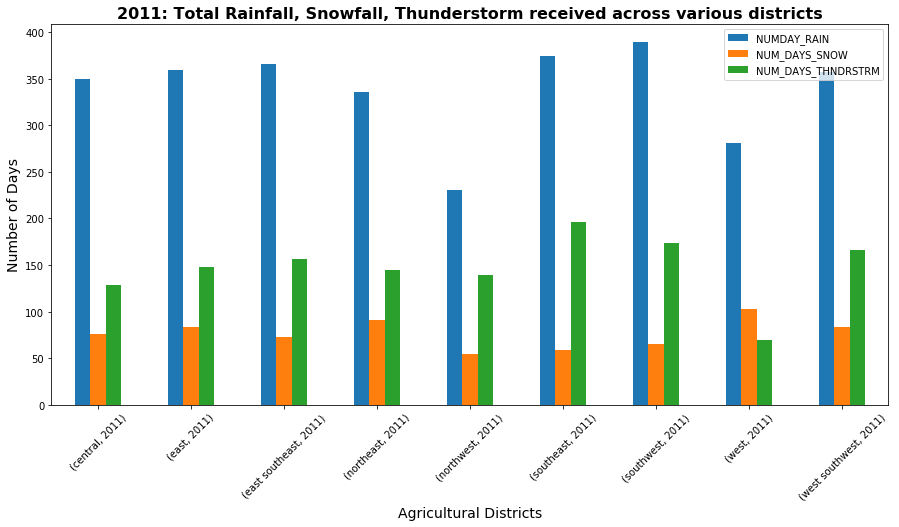

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2012        337.0           64.0               126.0
east           2012        309.0           74.0               153.0
east southeast 2012        340.0           73.0               144.0
northeast      2012        324.0           86.0               156.0
northwest      2012        217.0           58.0               146.0




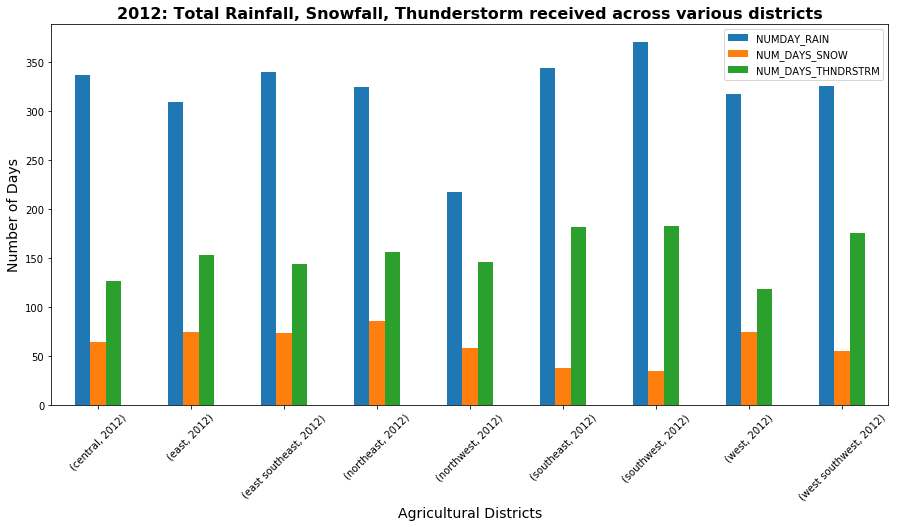

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2013        363.0          126.0               130.0
east           2013        365.0          143.0               136.0
east southeast 2013        385.0          137.0               152.0
northeast      2013        372.0          163.0               170.0
northwest      2013        257.0          103.0               137.0




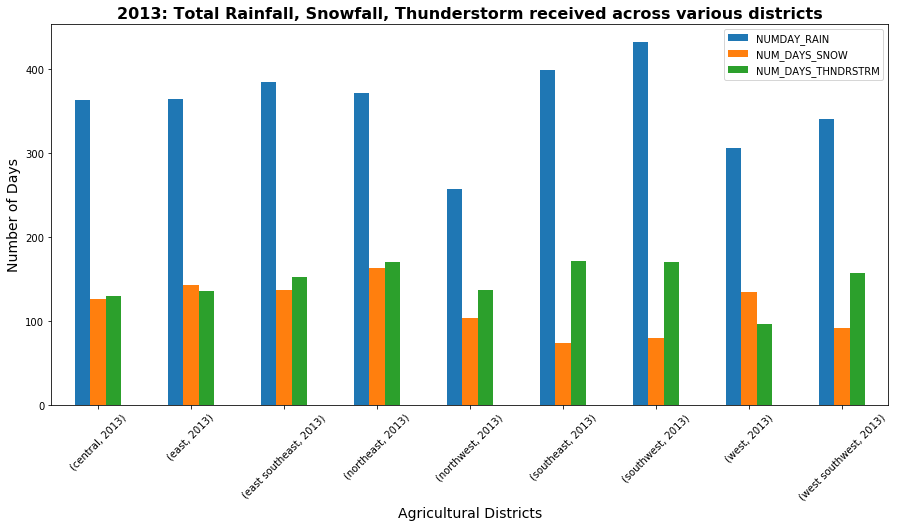

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2014        392.0          150.0               164.0
east           2014        402.0          167.0               183.0
east southeast 2014        421.0          140.0               200.0
northeast      2014        369.0          162.0               171.0
northwest      2014        231.0           99.0               144.0




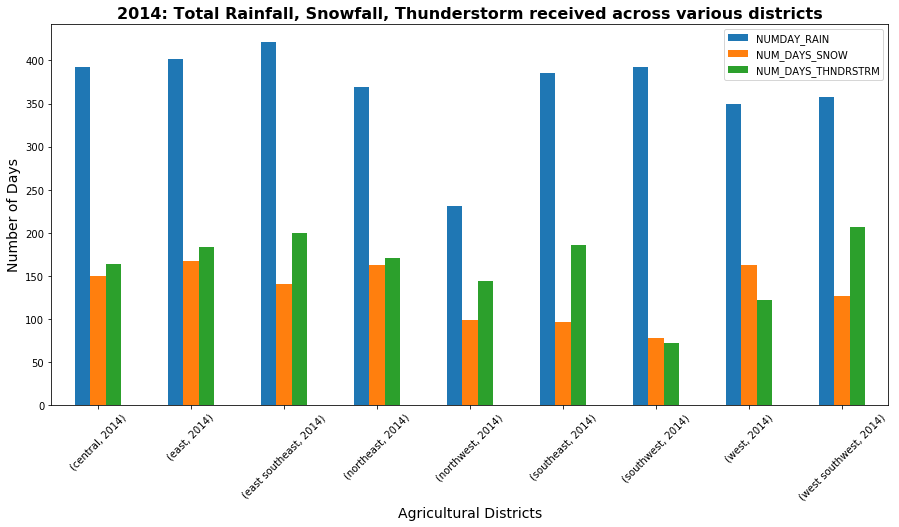

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2015        391.0           86.0               152.0
east           2015        405.0          100.0               176.0
east southeast 2015        389.0           88.0               181.0
northeast      2015        357.0          118.0               177.0
northwest      2015        234.0           69.0               154.0




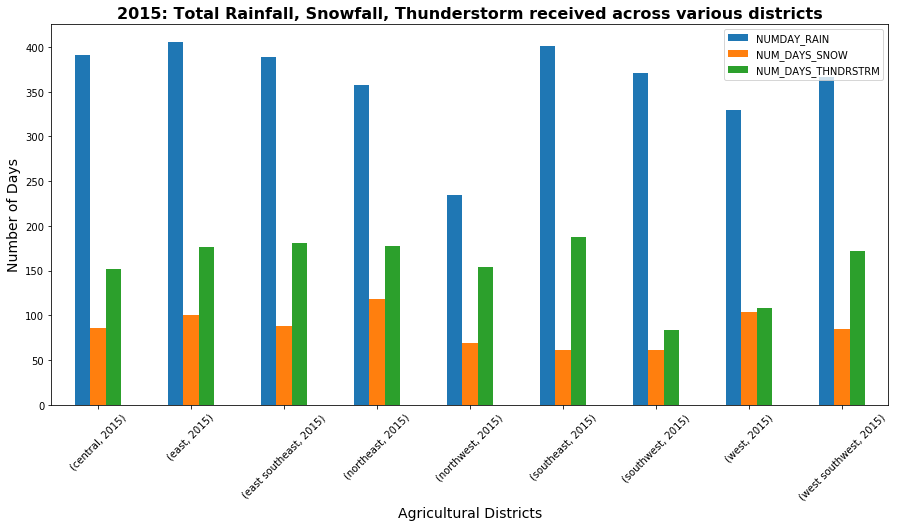

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2016        353.0           70.0               166.0
east           2016        379.0           91.0               166.0
east southeast 2016        362.0           66.0               201.0
northeast      2016        389.0          114.0               196.0
northwest      2016        341.0           85.0               185.0




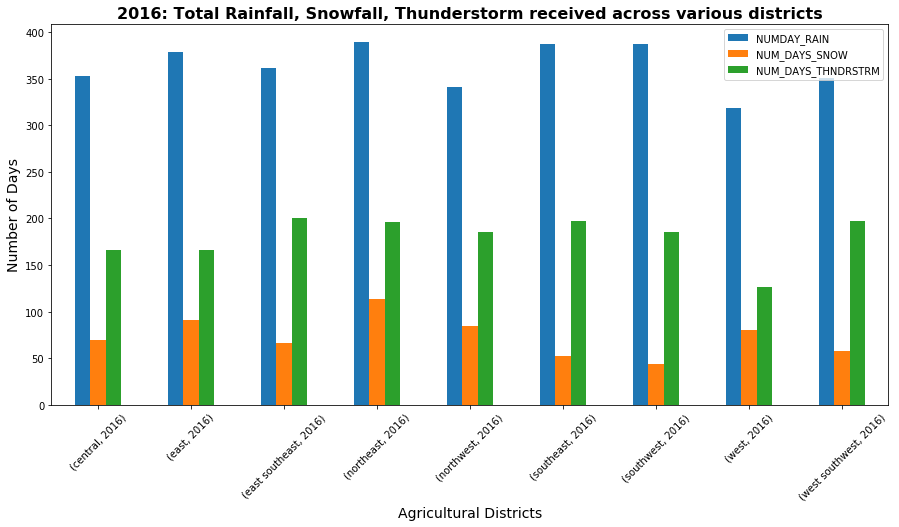

In [13]:
start_year = min(sample_weather_data['YEAR'])
end_year = max(sample_weather_data['YEAR'])

# end year + 1 to get it to 2016
for year in range(start_year, end_year+1):
    groupby_yearly = sample_weather_data[sample_weather_data['YEAR'] == year].groupby(['AG_DISTRICT', 'YEAR'])
    groupby_yearly_ppt_data = groupby_yearly['NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_THNDRSTRM'].sum()
    
    print(groupby_yearly_ppt_data.head())
    print("\n")

    # Plotting Code
    rainfall_yearly_title = str(year) + ": Total Rainfall, Snowfall, Thunderstorm received across various districts"

    ax = groupby_yearly_ppt_data.plot(kind='bar', figsize=(15, 7))
    ax.set_title(rainfall_yearly_title, fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Days', fontsize=14)
    plt.xlabel('Agricultural Districts', fontsize=14)
    plt.legend()
    plt.show()
    #plt.savefig("results.jpg")